In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs

from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create dataset

In [2]:
data = make_blobs(n_samples = 300,
                  n_features = 2,
                  centers = 2,
                  cluster_std = 1,
                  random_state = 1)

In [3]:
X,y = data

## Add noise

In [4]:
np.random.seed(seed = 1)
noise = np.random.normal(size = X.shape[0])
noise = pd.Series(noise)

In [5]:
features = pd.DataFrame(X)

features = pd.concat([features,noise], axis = 1)
features.columns = ['feat1', 'feat2', 'feat3']

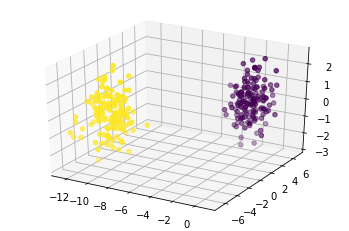

In [6]:
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
ax.scatter(features['feat1'],features['feat2'],features['feat3'], c = y);

# Preprocess

In [7]:
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# Model

We will create a simple autoencoder which starts with 3 neurons decreases to 2 and then increases to 3.

In [8]:
encoder = Sequential()
encoder.add(Dense(units = 2, 
                  activation = 'relu', 
                  input_shape = [3]))

decoder = Sequential()
decoder.add(Dense(units = 3, 
                  activation = 'relu',
                  input_shape = [2]))

In [9]:
Autoencoder = Sequential([encoder, decoder])

In [10]:
from tensorflow.keras.optimizers import Adam

In [11]:
Autoencoder.compile(loss = 'mse', optimizer= 'adam')

In [12]:
Autoencoder.fit(scaled_features,
                y,
                epochs = 200)

Epoch 1/200
10/10 [==============================] - 0s 909us/step - loss: 0.4878
Epoch 2/200
10/10 [==============================] - 0s 2ms/step - loss: 0.4791
Epoch 3/200
10/10 [==============================] - 0s 2ms/step - loss: 0.4710
Epoch 4/200
10/10 [==============================] - 0s 1ms/step - loss: 0.4632
Epoch 5/200
10/10 [==============================] - 0s 2ms/step - loss: 0.4553
Epoch 6/200
10/10 [==============================] - 0s 2ms/step - loss: 0.4480
Epoch 7/200
10/10 [==============================] - 0s 2ms/step - loss: 0.4407
Epoch 8/200
10/10 [==============================] - 0s 920us/step - loss: 0.4337
Epoch 9/200
10/10 [==============================] - 0s 3ms/step - loss: 0.4265
Epoch 10/200
10/10 [==============================] - 0s 2ms/step - loss: 0.4196
Epoch 11/200
10/10 [==============================] - 0s 2ms/step - loss: 0.4127
Epoch 12/200
10/10 [==============================] - 0s 1ms/step - loss: 0.4060
Epoch 13/200
10/10 [=============

Epoch 102/200
10/10 [==============================] - 0s 1ms/step - loss: 0.1685
Epoch 103/200
10/10 [==============================] - 0s 995us/step - loss: 0.1685
Epoch 104/200
10/10 [==============================] - 0s 1ms/step - loss: 0.1684
Epoch 105/200
10/10 [==============================] - 0s 784us/step - loss: 0.1684
Epoch 106/200
10/10 [==============================] - 0s 984us/step - loss: 0.1683
Epoch 107/200
10/10 [==============================] - 0s 1ms/step - loss: 0.1683
Epoch 108/200
10/10 [==============================] - 0s 993us/step - loss: 0.1682
Epoch 109/200
10/10 [==============================] - 0s 765us/step - loss: 0.1682
Epoch 110/200
10/10 [==============================] - 0s 820us/step - loss: 0.1682
Epoch 111/200
10/10 [==============================] - 0s 1ms/step - loss: 0.1681
Epoch 112/200
10/10 [==============================] - 0s 759us/step - loss: 0.1681
Epoch 113/200
10/10 [==============================] - 0s 898us/step - loss: 0.1681


10/10 [==============================] - 0s 928us/step - loss: 0.1672


In [13]:
features_2d = encoder.predict(scaled_features)

In [14]:
features_2d.shape

(300, 2)

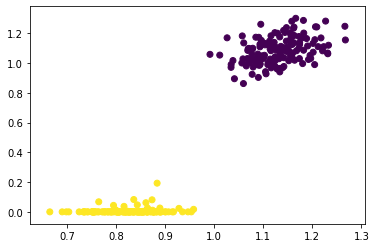

In [15]:
plt.scatter(features_2d[:,0],features_2d[:,1], c = y);